------------------------
#### image classification of MNIST (digits)
- standard MLP
- CNN

------------------------

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
batch_size  = 128
num_classes = 10

epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
from keras.datasets import mnist

In [5]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Training set images shape: {}".format(X_train.shape))
print("Training set labels shape: {}".format(y_train.shape))

print("Test set images shape: {}".format(X_test.shape))
print("Test set labels shape: {}".format(y_test.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


#### Exploratory data analysis
Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.

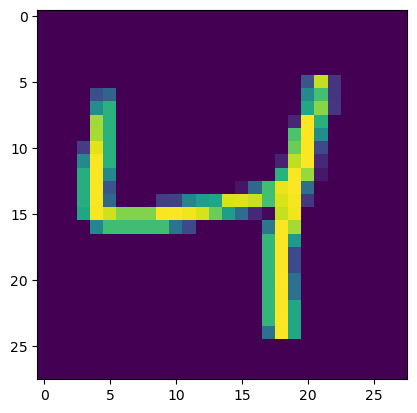

In [7]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(X_train[2])

In [8]:
#check image shape
X_train[0].shape

(28, 28)

- the shape of every image in the mnist dataset is 28 x 28

- When using real-world datasets, 28 x 28 is a fairly small size

#### Data pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. 

The first number is the number of images (60,000 for X_train and 10,000 for X_test). 

Then comes the shape of each image (28x28). 

The last number is 1, which signifies that the images are greyscale.

In [9]:
#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test  = X_test.reshape( X_test.shape[0],  img_rows, img_cols, 1)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test  = X_test.reshape(X_test.shape[0],   1, img_rows, img_cols)
    
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test  = X_test.reshape(X_test.shape[0],   img_rows, img_cols, 1)
    
    input_shape = (img_rows, img_cols, 1)

In [12]:
x_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

In [13]:
x_train /= 255
x_test  /= 255

In [14]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [15]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test  = keras.utils.to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())               # why we need flatten layer?

model.add(Dense(10, activation='softmax'))

- Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

- 64 in the first layer and 32 in the second layer are the number of nodes in each layer. 

- Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

- Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

- In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

- ‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

- We will have 10 nodes in our output layer, one for each possible outcome (0–9).

- The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

#### Compiling the model
Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=5,
                  verbose=1,
                  validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 163s 345ms/step - loss: 2.2835 - accuracy: 0.1371 - val_loss: 2.2712 - val_accuracy: 0.1623
Epoch 2/5
469/469 [==============================] - 162s 344ms/step - loss: 2.2566 - accuracy: 0.1942 - val_loss: 2.2396 - val_accuracy: 0.2250
Epoch 3/5
469/469 [==============================] - 160s 340ms/step - loss: 2.2194 - accuracy: 0.2563 - val_loss: 2.1945 - val_accuracy: 0.2883
Epoch 4/5
469/469 [==============================] - 157s 334ms/step - loss: 2.1647 - accuracy: 0.3284 - val_loss: 2.1267 - val_accuracy: 0.3802
Epoch 5/5
469/469 [==============================] - 156s 334ms/step - loss: 2.0825 - accuracy: 0.4394 - val_loss: 2.0250 - val_accuracy: 0.5048


In [27]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.048078677042946216
Test accuracy: 0.9836000204086304


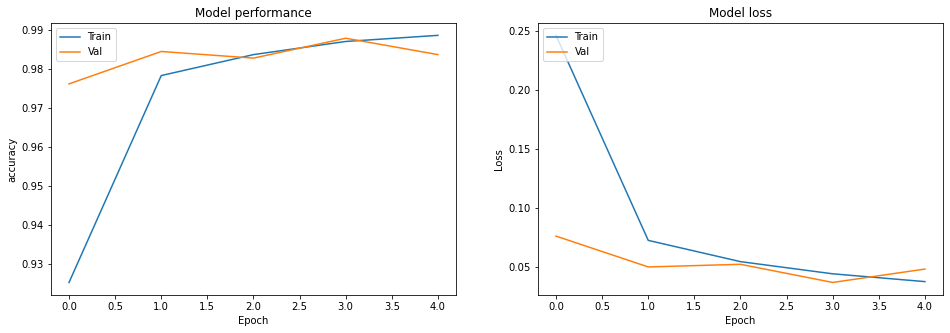

In [28]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])

ax1.set_title('Model performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'], loc='upper left');

In [29]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)